In [198]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics, pipeline, model_selection, preprocessing

In [85]:
iris = datasets.load_iris()
X_base = iris.data[:,:2]
Y_base = iris.target

In [132]:
def plot_boundary(clf, X, Y, figsize = (8,6)):
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min,x_max*1.01, -(x_min-x_max)/101.), np.arange(y_min, y_max*1.01, -(y_min-y_max)/101.))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize= figsize)
    for value, color in zip(range(3),"mcy"):
        plt.plot(X[Y == value,0], X[Y == value,1], color+"o")
    plt.contourf(xx, yy, Z)


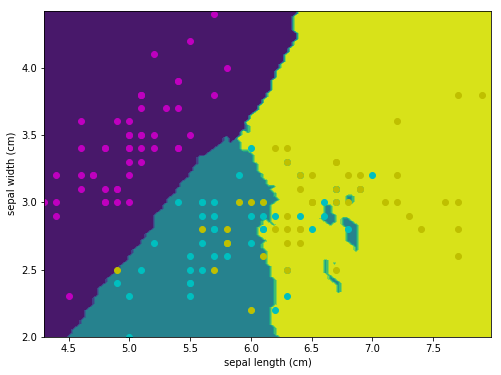

In [126]:
clf_base = KNeighborsClassifier(n_neighbors = 15)
clf_base.fit(X_base, Y_base)
plot_boundary(clf_base, X_base, Y_base)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

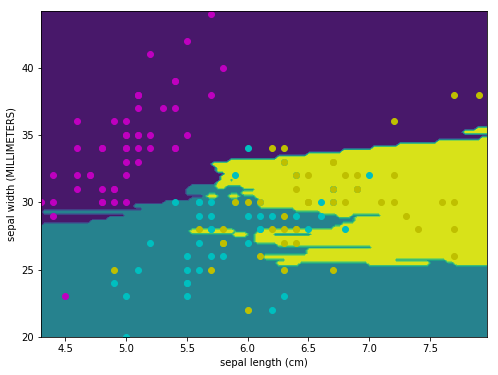

In [128]:
clf_brokenscale = KNeighborsClassifier(n_neighbors=15)
X_broken = np.dot(X_base,np.array([[1,0.],[0., 10.]]))
clf_brokenscale.fit(X_broken, Y_base)
plot_boundary(clf_brokenscale, X_broken, Y_base)
plt.xlabel(iris.feature_names[0])
plt.ylabel("sepal width (MILLIMETERS)")
plt.show()

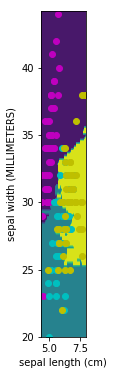

In [133]:
plot_boundary(clf_brokenscale, X_broken, Y_base, (.8,6))
plt.xlabel(iris.feature_names[0])
plt.ylabel("sepal width (MILLIMETERS)")
plt.show()

In [131]:
print("base score", model_selection.cross_val_score(KNeighborsClassifier(15), X_base, Y_base))

print("broken score", model_selection.cross_val_score(KNeighborsClassifier(15), X_broken, Y_base))

#print("4D score", model_selection.cross_val_score(KNeighborsClassifier(15), iris.data, Y_base))

base score [0.73333333 0.8        0.73333333 0.86666667 0.8       ]
broken score [0.63333333 0.83333333 0.73333333 0.73333333 0.83333333]


In [145]:
from sklearn.svm import NuSVC, SVC

In [214]:
def full_test(clf, X= X_base, figsize = (8,6)):
    clf.fit(X, Y_base)
    plot_boundary(clf, X, Y_base, figsize)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1] if X is X_base else "broken axis")
    plt.show()

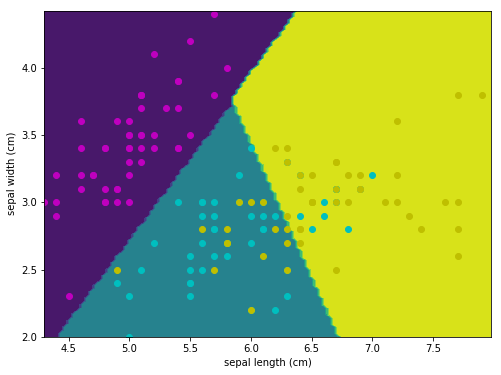

In [245]:
full_test(SVC(kernel='linear',C=100))

In [158]:
print("2D KNN score", model_selection.cross_val_score(KNeighborsClassifier(15), X_base, Y_base))
print("2D SVC score", model_selection.cross_val_score(SVC(), X_base, Y_base))
print("4D KNN score", model_selection.cross_val_score(KNeighborsClassifier(15), iris.data, Y_base))
print("4D SVC score", model_selection.cross_val_score(SVC(), iris.data, Y_base))

2D KNN score [0.73333333 0.8        0.73333333 0.86666667 0.8       ]
2D SVC score [0.73333333 0.86666667 0.76666667 0.86666667 0.86666667]
4D KNN score [0.93333333 1.         0.93333333 0.96666667 1.        ]
4D SVC score [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]


In [151]:
print("broken 2D SVC score", model_selection.cross_val_score(SVC(), X_broken, Y_base))

broken 2D SVC score [0.6        0.6        0.66666667 0.66666667 0.7       ]


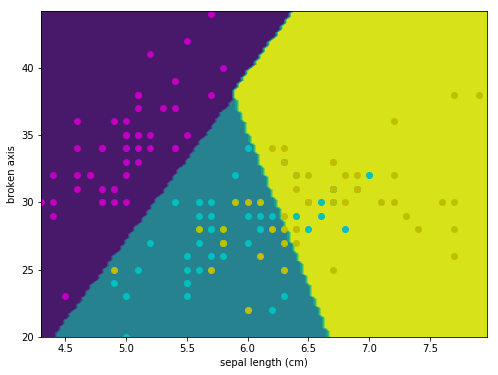

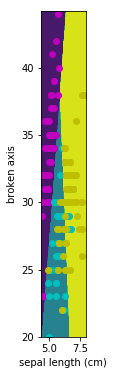

In [313]:
full_test(SVC(kernel='linear', C=100), X_broken)
full_test(SVC(kernel='linear', C=100), X_broken, (.8,6))

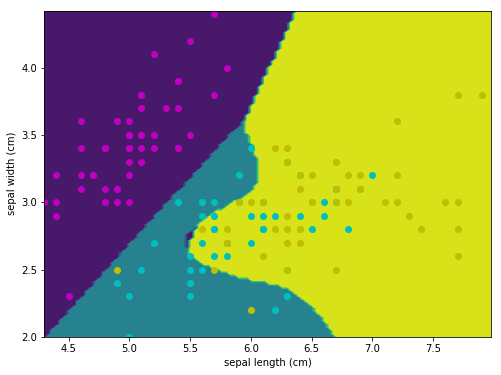

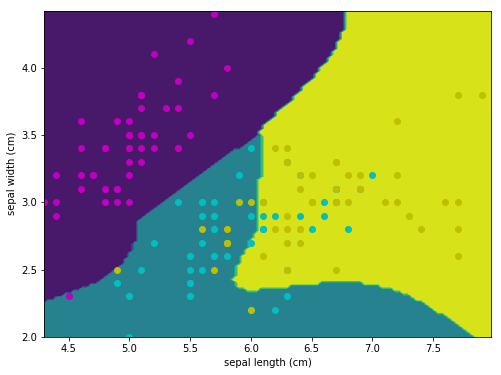

In [303]:
myNu = 0.561
without_scaling = NuSVC(nu=myNu)
with_scaling = pipeline.make_pipeline(preprocessing.StandardScaler(),NuSVC(nu=myNu))
full_test(without_scaling)
full_test(with_scaling)

In [314]:
print("2D KNN score   ", model_selection.cross_val_score(KNeighborsClassifier(15), X_base, Y_base))
print("2D LinSVC score", model_selection.cross_val_score(SVC(kernel='linear', C=100), X_base, Y_base))
print("2D RbfSVC score", model_selection.cross_val_score(without_scaling, X_base, Y_base))
print("2D scaled score", model_selection.cross_val_score(with_scaling, X_base, Y_base))
print("2D broken score", model_selection.cross_val_score(with_scaling, X_broken, Y_base))
#comment="""
print("4D KNN score   ", model_selection.cross_val_score(KNeighborsClassifier(15), iris.data, Y_base))
print("4D LinSVC score", model_selection.cross_val_score(SVC(kernel='linear', C=100), iris.data, Y_base))
print("4D RbfSVC score", model_selection.cross_val_score(without_scaling, iris.data, Y_base))
print("4D scaled score", model_selection.cross_val_score(with_scaling, iris.data, Y_base))
#"""

2D KNN score    [0.73333333 0.8        0.73333333 0.86666667 0.8       ]
2D LinSVC score [0.73333333 0.83333333 0.76666667 0.86666667 0.86666667]
2D RbfSVC score [0.7        0.7        0.7        0.7        0.56666667]
2D scaled score [0.73333333 0.8        0.73333333 0.86666667 0.7       ]
2D broken score [0.73333333 0.8        0.73333333 0.86666667 0.7       ]
4D KNN score    [0.93333333 1.         0.93333333 0.96666667 1.        ]
4D LinSVC score [1.         1.         0.9        0.93333333 1.        ]
4D RbfSVC score [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
4D scaled score [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]


In [330]:
breast = datasets.load_breast_cancer()
Y_base = breast.target

myNu = 0.1
without_scaling = NuSVC(nu=myNu)
with_scaling = pipeline.make_pipeline(preprocessing.StandardScaler(),NuSVC(nu=myNu))
print("4D KNN score   ", model_selection.cross_val_score(KNeighborsClassifier(15), breast.data, Y_base))
print("4D LinSVC score", model_selection.cross_val_score(SVC(kernel='linear', C=10), breast.data, Y_base))
print("4D RbfSVC score", model_selection.cross_val_score(without_scaling, breast.data, Y_base))
print("4D scaled score", model_selection.cross_val_score(with_scaling, breast.data, Y_base))

4D KNN score    [0.86842105 0.93859649 0.93859649 0.95614035 0.94690265]
4D LinSVC score [0.93859649 0.93859649 0.97368421 0.94736842 0.96460177]
4D RbfSVC score [0.94736842 0.95614035 0.93859649 0.93859649 0.9380531 ]
4D scaled score [0.97368421 0.97368421 0.98245614 0.96491228 0.99115044]


In [334]:
print("4D KNN score   ", model_selection.cross_val_score(pipeline.make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier(5)), breast.data, Y_base))

4D KNN score    [0.96491228 0.95614035 0.98245614 0.95614035 0.96460177]


In [340]:

print("4D LinSVC score", model_selection.cross_val_score(pipeline.make_pipeline(preprocessing.StandardScaler(),SVC(kernel='linear', C=10000)), breast.data, Y_base))

4D LinSVC score [0.96491228 0.92982456 0.95614035 0.96491228 0.97345133]
